# Real-world Data Wrangling

## 1.Step:  Gather Data 
 Gather Data involves collecting the raw datasets needed for your analysis. This can be done using different methods such as:

Programmatic gathering (API or direct download): Automatically fetching data from online sources using code, for example downloading a COVID-19 dataset via a URL or API.

Manual gathering: Downloading datasets manually from websites, like exporting a population dataset from the World Bank website in CSV format.

## 1.1 Problem Statement:

This project analyzes the relationship between COVID-19 daily cases and country populations by combining two datasets that contain quality and tidiness issues such as missing data and inconsistent country names.

Research Question
How does the number of COVID-19 cases relate to the population size of each country over time?

### COVID-19 Daily Cases Dataset (via API)
Source: Our World in Data COVID-19 Dataset

Contains: Daily COVID-19 cases, deaths, testing data by country

Issues: Missing values, inconsistent date formats, multiple granularities (daily), country name inconsistencies

In [66]:
import pandas as pd
import requests
from io import StringIO

# COVID-19 dataset URL (Our World in Data)
url_covid = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

# Download data
response = requests.get(url_covid)
if response.status_code == 200:
    df_covid = pd.read_csv(StringIO(response.text))
    print("COVID data downloaded successfully")
    
    # Save data locally as CSV file
    df_covid.to_csv("owid-covid-data.csv", index=False)
    print("Data saved locally as owid-covid-data.csv")
else:
    raise Exception("Failed to download COVID data")

# Preview first 5 rows
print(df_covid.head())


COVID data downloaded successfully
Data saved locally as owid-covid-data.csv
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  hand

### Dataset B –Country Population Data (manual download)
Source: World Bank Population Data

Contains: Annual total population for countries

Issues: Missing data for some years/countries, country naming variations, wide format data needing melting



In [67]:
import pandas as pd

# Path to your CSV file
file_path = 'API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv'

# Read the CSV file, skipping the first 4 rows of metadata header
df_population = pd.read_csv(file_path, skiprows=4)

# Preview the first 5 rows
print(df_population.head())


                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54922.0      55578.0      56320.0      57002.0      57619.0   
1  130075728.0  133534923.0  137171659.0  140945536.0  144904094.0   
2    9035043.0    9214083.0    9404406.0    9604487.0    9814318.0   
3   97630925.0   99706674.0  101854756.0  104089175.0  106388440.0   
4    5231654.0    5301583.0    5354310.0    5408320.0    5464187.0   

          1965  ...         2016         2017         2018         2019  \
0      58190.0  .

## 2. Assess data
After gathering the data, we assessed it both programmatically and visually to identify data quality and tidiness issues.



### 2.1 Dataset 1: COVID-19 Daily Cases - Data Quality Issues





In [68]:
import pandas as pd



print("COVID-19 Dataset Info:")
print(df_covid.info())  # Check for nulls and data types

# Check missing values count
missing_covid = df_covid.isnull().sum()
print("\nMissing values per column in COVID-19 dataset:")
print(missing_covid[missing_covid > 0])

# Check for inconsistent date formats (should be datetime)
print("\nSample date column types and values:")
print(df_covid['date'].head())

# Check country name inconsistencies (count unique countries)
print("\nNumber of unique countries in COVID dataset:", df_covid['location'].nunique())

# Example justification:
print("\nJustification:")
print("- Missing values in 'total_cases' and 'new_cases' may be due to delayed reporting or low case counts.\n"
      "- The 'date' column must be converted to datetime type for consistency.\n"
      "- Country names may have inconsistent formatting, requiring normalization.\n")






COVID-19 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409

### Data Quality Issues Justification for COVID-19 Dataset

- There are significant missing values in key columns such as `total_cases`, `new_cases`, and `total_deaths`. This likely results from delayed reporting, underreporting in some countries, or genuinely low incidence at certain times, which impacts completeness and accuracy.

- The `continent` column has missing values (26,525 rows), possibly due to aggregated regions or territories not assigned to continents, affecting data consistency.

- Many columns related to testing, hospitalizations, and vaccinations have large gaps (e.g., `icu_patients`, `total_tests`, `total_vaccinations`) reflecting inconsistent data collection efforts across countries and time, reducing reliability.

- The `date` column is stored as an object (string), so it needs conversion to a datetime type to allow proper time-series analysis and to avoid parsing errors.

- Country names (`location`) may be inconsistently formatted or use different naming conventions (e.g., abbreviations, synonyms), which requires normalization for accurate merging with other datasets.

- Certain health and demographic indicators such as `human_development_index`, `life_expectancy`, and `population_density` contain missing values due to varying update frequencies or unavailability, impacting the dataset's comprehensiveness.

- Extremely sparse columns like `excess_mortality` (with over 400,000 missing values) indicate data quality issues or unavailability, limiting their usability in analysis.

Overall, these issues reflect common challenges in pandemic data reporting and require careful handling in cleaning and imputation to ensure valid analysis.


### 2.2 Dataset 2: World Bank Population Data - Data Quality Issues



In [69]:


print("\nPopulation Dataset Info:")
print(df_population.info())  # Check nulls and types

# Check missing values per year columns
years = df_population.columns[4:]  # Assuming first 4 columns are metadata
missing_population = df_population[years].isnull().sum()
print("\nMissing values per year in Population dataset:")
print(missing_population[missing_population > 0])

# Check for country name variations (unique counts)
print("\nNumber of unique countries in Population dataset:", df_population['Country Name'].nunique())




Population Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973     

### Data Quality Issues Justification for Population Dataset

- There are missing values in almost every year's population data (e.g., 2 missing values in early years like 1960–1964 and 1 missing value in recent years such as 2021–2024). This indicates incomplete data collection or reporting gaps for certain countries or territories.

- The dataset contains an extra column `Unnamed: 69` with all missing values, likely an artifact from the CSV file export process. This should be removed to clean the dataset.

- The dataset is in wide format with one column per year, which is not ideal for analysis and requires reshaping (melting) to a long format for tidiness.

- Country names and codes are consistent and complete (no missing values), but potential naming variations might exist compared to other datasets, necessitating normalization before merging.

- The missing data across years can affect time series analyses and may require interpolation or other imputation strategies.

Overall, these data quality issues are typical for large longitudinal datasets collected over many decades, requiring preprocessing steps to address missing values and reshape data for effective analysis.


### Dataset 1: COVID-19 Daily Cases - Tidiness Issues 

In [70]:
import pandas as pd


# --- Dataset 1: COVID-19 Daily Cases - Tidiness Issues ---

# 1. Multiple variables stored in one column: 'location' contains country names, but other geographic levels may mix.
print("COVID-19 dataset sample 'location' values:")
print(df_covid['location'].unique()[:10])

# 2. Date is in string format, needs to be converted to datetime type for easier time-based analysis
print("\nCOVID-19 'date' column dtype before conversion:", df_covid['date'].dtype)
df_covid['date'] = pd.to_datetime(df_covid['date'])
print("COVID-19 'date' column dtype after conversion:", df_covid['date'].dtype)

# 3. Data is recorded daily — high granularity; may need aggregation for some analyses
print("\nNumber of unique dates in COVID dataset:", df_covid['date'].nunique())

COVID-19 dataset sample 'location' values:
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina']

COVID-19 'date' column dtype before conversion: object
COVID-19 'date' column dtype after conversion: datetime64[ns]

Number of unique dates in COVID dataset: 1688


### Justification for Data Tidiness Issues in COVID-19 Dataset

- The **`location`** column contains mixed types of geographic entities such as countries (e.g., Afghanistan, Albania), continents/regions (e.g., Africa), and territories (e.g., American Samoa). This violates the tidy data principle that each variable should have its own column. Geographic level should be separated into distinct columns (e.g., Country, Continent).

- The **`date`** column was originally stored as an object (string), which is not ideal for time series analysis. Converting it to a datetime type ensures consistent, standardized date handling.

- The dataset contains **daily data granularity** (1688 unique dates), which might be too fine for some analyses and may require aggregation to monthly or yearly levels depending on the research question.

These tidiness issues need to be addressed to facilitate clean, consistent, and meaningful analysis.


### Dataset 2: World Bank Population Data - Tidiness Issues

In [71]:

# 1. Data is in wide format: each year is a separate column, needs to be melted into long format
print("\nPopulation dataset columns sample (years):")
print(df_population.columns[4:10])  # Show some year columns

# Melt population data from wide to long format
population_long = df_population.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name='Year',
    value_name='Population'
)

print("\nPopulation dataset after melting:")
print(population_long.head())

# 2. 'Year' column is object type, convert to integer
population_long['Year'] = pd.to_numeric(population_long['Year'], errors='coerce').astype('Int64')

# 3. Potentially multiple observations per country per year if other indicators exist (should filter by Indicator Name if needed)
print("\nUnique indicator names in population dataset:")
print(population_long['Indicator Name'].unique())


Population dataset columns sample (years):
Index(['1960', '1961', '1962', '1963', '1964', '1965'], dtype='object')

Population dataset after melting:
                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

   Year   Population  
0  1960      54922.0  
1  1960  130075728.0  
2  1960    9035043.0  
3  1960   97630925.0  
4  1960    5231654.0  

Unique indicator names in population dataset:
['Population, total']


### Justification for Data Tidiness Issues in Population Dataset

- The dataset is originally in a **wide format** with each year represented as a separate column (e.g., '1960', '1961', '1962', ...). This format violates the tidy data principle which states that each variable should form a column. Here, the years should be values of a single 'Year' column.

- The dataset requires **melting (pivoting longer)** to convert year columns into a single 'Year' variable column, with corresponding population values in another column. This will create a long format that is easier to analyze and join with other datasets.

- The dataset contains a single indicator ('Population, total'), so this column is consistent, but the multiple year columns create unnecessary complexity and redundancy.

Fixing these tidiness issues will facilitate easier filtering, grouping, and merging with other datasets like the COVID-19 data.


## 3. Clean data

### Dataset 1: COVID-19 Daily Cases Cleaning — Data Quality Issue


In [72]:
import pandas as pd



# 1. Convert 'date' to datetime
df_covid['date'] = pd.to_datetime(df_covid['date'], errors='coerce')
print("COVID-19 Dataset - 'date' column dtype after conversion:", df_covid['date'].dtype)

# 2. Normalize country names
df_covid['location'] = df_covid['location'].str.lower().str.strip()
print("COVID-19 Dataset - Sample normalized locations:\n", df_covid['location'].unique()[:5])

# 3. Fill missing values in critical numeric columns with 0
critical_cols = [
    'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
    'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million'
]
for col in critical_cols:
    missing_before = df_covid[col].isna().sum()
    df_covid[col] = df_covid[col].fillna(0)
    missing_after = df_covid[col].isna().sum()
    print(f"COVID-19 Dataset - '{col}' missing values before: {missing_before}, after: {missing_after}")

# 4. Drop columns with too many missing values
cols_to_drop = [
    'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
    'excess_mortality', 'excess_mortality_cumulative_per_million'
]
df_covid.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print("COVID-19 Dataset - Columns after dropping excess mortality:", df_covid.columns.tolist())

# Save cleaned COVID data locally
df_covid.to_csv("cleaned_owid_covid_data.csv", index=False)
print("Cleaned COVID-19 dataset saved as 'cleaned_owid_covid_data.csv'")

COVID-19 Dataset - 'date' column dtype after conversion: datetime64[ns]
COVID-19 Dataset - Sample normalized locations:
 ['afghanistan' 'africa' 'albania' 'algeria' 'american samoa']
COVID-19 Dataset - 'total_cases' missing values before: 17631, after: 0
COVID-19 Dataset - 'new_cases' missing values before: 19276, after: 0
COVID-19 Dataset - 'total_deaths' missing values before: 17631, after: 0
COVID-19 Dataset - 'new_deaths' missing values before: 18827, after: 0
COVID-19 Dataset - 'total_cases_per_million' missing values before: 17631, after: 0
COVID-19 Dataset - 'new_cases_per_million' missing values before: 19276, after: 0
COVID-19 Dataset - 'total_deaths_per_million' missing values before: 17631, after: 0
COVID-19 Dataset - Columns after dropping excess mortality: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed

### Justification for Cleaning Quality Issues in COVID-19 Dataset (Dataset 1)

- The **'date'** column was converted from object/string type to `datetime64[ns]` to ensure proper date handling and facilitate time-based analysis.
- The **'location'** values were normalized to lowercase and stripped of whitespace to fix inconsistent country naming conventions, which improves merging and filtering operations.
- Missing values in key columns such as **'total_cases'**, **'new_cases'**, **'total_deaths'**, and **'new_deaths'** were addressed (filled or removed) ensuring no missing data remains in these critical epidemiological indicators.
- Columns related to **excess mortality** were dropped because of extremely high missingness and irrelevance to the current analysis, simplifying the dataset.
- The resulting dataset is clean, consistent, and ready for analysis with no missing critical values, uniform country names, and correct date formats.


 ### Clean Data for Dataset 2 — Data Quality Issue


In [73]:
import pandas as pd

import pandas as pd

# Load the Population dataset from CSV
df_pop = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv", skiprows=4)


# Step 1: Drop empty or irrelevant columns (e.g., 'Unnamed: 69' if exists)
if 'Unnamed: 69' in df_pop.columns:
    df_pop.drop(columns=['Unnamed: 69'], inplace=True)
    print("Population Dataset - 'Unnamed: 69' column dropped")

# Step 2: Melt year columns to long format
year_cols = df_pop.columns[4:]  # First 4 columns are metadata
df_pop_long = df_pop.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Population'
)
print("Population Dataset - Melted data sample:\n", df_pop_long.head())

# Step 3: Convert 'Year' and 'Population' to numeric
df_pop_long['Year'] = pd.to_numeric(df_pop_long['Year'], errors='coerce').astype('Int64')
df_pop_long['Population'] = pd.to_numeric(df_pop_long['Population'], errors='coerce')

# Step 4: Handle missing population values
missing_pop_before = df_pop_long['Population'].isna().sum()
df_pop_long.dropna(subset=['Population'], inplace=True)
missing_pop_after = df_pop_long['Population'].isna().sum()
print(f"Population Dataset - Missing 'Population' values before: {missing_pop_before}, after: {missing_pop_after}")

# Step 5: Reset index
df_pop_long.reset_index(drop=True, inplace=True)

# Step 6: Save cleaned data
df_pop_long.to_csv("cleaned_population_data.csv", index=False)
print("Cleaned Population dataset saved as 'cleaned_population_data.csv'")

# Step 7: Print final cleaned dataset shape
print(f"Population Dataset cleaned shape: {df_pop_long.shape}")


Population Dataset - 'Unnamed: 69' column dropped
Population Dataset - Melted data sample:
                   Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

   Year   Population  
0  1960      54922.0  
1  1960  130075728.0  
2  1960    9035043.0  
3  1960   97630925.0  
4  1960    5231654.0  
Population Dataset - Missing 'Population' values before: 95, after: 0
Cleaned Population dataset saved as 'cleaned_population_data.csv'
Population Dataset cleaned shape: (17195, 6)


### Justification for Cleaning Quality Issues in Population Dataset (Dataset 2)

- The dataset was originally in a **wide format** with years as columns, which was **melted into a long format** to make it tidy and easier to analyze over time.
- The **'Year'** and **'Population'** columns were converted to numeric types to ensure proper data handling and calculations.
- There were **95 missing values** in the 'Population' column initially, likely due to unavailable data for certain countries or years. These missing values were **removed** to ensure accuracy in analysis.
- The cleaning process removed irrelevant or empty columns (e.g., 'Unnamed: 69') to reduce noise.
- After cleaning, the dataset is **complete with no missing population values**, properly formatted for time series and country-level population analysis.


### Dataset 1: COVID-19 Daily Cases — Clean Tidiness Issues


In [74]:
import pandas as pd



# Tidiness issues to fix:
# 1. Ensure 'date' column is datetime (already done but double-check)
df_covid['date'] = pd.to_datetime(df_covid['date'], errors='coerce')

# 2. Normalize country/location names: lowercase and strip whitespace
df_covid['location_normalized'] = df_covid['location'].str.lower().str.strip()

# 3. Drop unnecessary columns that cause duplication or are irrelevant (optional)
# For example, dropping excess mortality columns if not needed
excess_mortality_cols = [
    'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
    'excess_mortality', 'excess_mortality_cumulative_per_million'
]
df_covid.drop(columns=[col for col in excess_mortality_cols if col in df_covid.columns], inplace=True)

# 4. If multiple granularities exist, e.g., daily and weekly, decide on one or aggregate accordingly
# Here we keep daily data only (already the case)

print("COVID-19 Tidiness cleaned:")
print(df_covid[['location', 'location_normalized', 'date']].head())
print(f"Columns after tidiness clean: {list(df_covid.columns)}")


COVID-19 Tidiness cleaned:
      location location_normalized       date
0  afghanistan         afghanistan 2020-01-05
1  afghanistan         afghanistan 2020-01-06
2  afghanistan         afghanistan 2020-01-07
3  afghanistan         afghanistan 2020-01-08
4  afghanistan         afghanistan 2020-01-09
Columns after tidiness clean: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'n

### Justification for Tidiness Cleaning - Dataset 1: COVID-19 Daily Cases

- The **'location'** column was normalized into a new column **'location_normalized'** by converting all country/region names to lowercase and stripping whitespace.  
  This ensures consistent naming for merging and comparison with other datasets.

- The **'date'** column was confirmed and converted to **datetime** data type to standardize date values and enable time series analysis.

- Unnecessary columns, especially those related to excess mortality, were dropped to reduce redundancy and focus the dataset on core variables.

- After tidiness cleaning, the dataset now has a consistent and clean structure where:
  - Each row represents one country/region on one date.
  - Country names are standardized for uniformity.
  - Dates are in a proper format to enable time-based operations.

This tidiness cleanup facilitates easier integration with other datasets (like population data) and enables accurate and reliable analyses.


### Dataset 2: World Bank Population Data — Clean Tidiness Issues


In [75]:
import pandas as pd



# Tidiness issues:
# 1. Drop irrelevant columns like 'Unnamed: 69'
if 'Unnamed: 69' in df_pop.columns:
    df_pop.drop(columns=['Unnamed: 69'], inplace=True)

# 2. Melt year columns (wide format) into long format for tidiness
year_cols = df_pop.columns[4:]  # Assuming first 4 columns are metadata
df_pop_long = df_pop.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Population'
)

# 3. Convert 'Year' to numeric
df_pop_long['Year'] = pd.to_numeric(df_pop_long['Year'], errors='coerce').astype('Int64')

# 4. Normalize country names (lowercase and strip)
df_pop_long['country_normalized'] = df_pop_long['Country Name'].str.lower().str.strip()

# 5. Drop rows with missing 'Population' values
df_pop_long.dropna(subset=['Population'], inplace=True)

df_pop_long.reset_index(drop=True, inplace=True)

print("Population Tidiness cleaned:")
print(df_pop_long.head())
print(f"Population dataset shape after tidiness clean: {df_pop_long.shape}")


Population Tidiness cleaned:
                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

   Year   Population           country_normalized  
0  1960      54922.0                        aruba  
1  1960  130075728.0  africa eastern and southern  
2  1960    9035043.0                  afghanistan  
3  1960   97630925.0   africa western and central  
4  1960    5231654.0                       angola  
Population dataset shape after tidiness clean: (17195, 7)


### Justification for Tidiness Cleaning - Dataset 2: Population Data

- The dataset was transformed from a **wide format** (years as columns) into a **long format** with one row per country per year, making it tidy and easier to analyze over time.

- A new column **'country_normalized'** was added by converting **'Country Name'** values to lowercase and stripping whitespace.  
  This normalization is essential for consistent merging with other datasets, such as the COVID-19 data.

- The dataset now follows tidy data principles where:
  - Each row represents a single observation (population for one country in one year).
  - Each variable has its own column (Country, Year, Population, etc.).
  - This format simplifies time series analysis and dataset integration.

- By cleaning the data structure, we reduce redundancy and improve clarity, facilitating reliable downstream processing and merging.


### 3. Combine the two dataset



In [76]:
import pandas as pd

# Load cleaned COVID dataset
df_covid = pd.read_csv('cleaned_owid_covid_data.csv', parse_dates=['date'])

# Load cleaned population dataset
df_pop = pd.read_csv('cleaned_population_data.csv')

# Create country_normalized in both
df_covid['country_normalized'] = df_covid['location'].str.lower().str.strip()
df_pop['country_normalized'] = df_pop['Country Name'].str.lower().str.strip()

# Extract year from date in COVID data
df_covid['Year'] = df_covid['date'].dt.year

# Make sure population 'Year' is integer
df_pop['Year'] = df_pop['Year'].astype(int)

# Merge both datasets on country_normalized and Year
df_merged = pd.merge(
    df_covid,
    df_pop,
    how='inner',
    on=['country_normalized', 'Year'],
    suffixes=('', '_pop')
)

# Optional: Reorder columns for clarity (your full list)
desired_columns = [
    'iso_code','continent','location','date','total_cases','new_cases','new_cases_smoothed',
    'total_deaths','new_deaths','new_deaths_smoothed','total_cases_per_million',
    'new_cases_per_million','new_cases_smoothed_per_million','total_deaths_per_million',
    'new_deaths_per_million','new_deaths_smoothed_per_million','reproduction_rate',
    'icu_patients','icu_patients_per_million','hosp_patients','hosp_patients_per_million',
    'weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions',
    'weekly_hosp_admissions_per_million','total_tests','new_tests','total_tests_per_thousand',
    'new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand',
    'positive_rate','tests_per_case','tests_units','total_vaccinations','people_vaccinated',
    'people_fully_vaccinated','total_boosters','new_vaccinations','new_vaccinations_smoothed',
    'total_vaccinations_per_hundred','people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred','total_boosters_per_hundred',
    'new_vaccinations_smoothed_per_million','new_people_vaccinated_smoothed',
    'new_people_vaccinated_smoothed_per_hundred','stringency_index','population_density',
    'median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty',
    'cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers',
    'handwashing_facilities','hospital_beds_per_thousand','life_expectancy',
    'human_development_index','population','Year','country_normalized',
    'Country Name','Country Code','Indicator Name','Indicator Code','Population'
]

# Ensure only available columns are selected
final_columns = [col for col in desired_columns if col in df_merged.columns]
df_final = df_merged[final_columns]

# Save merged dataset
df_final.to_csv('merged_covid_population_data.csv', index=False)

print(f"✅ Merged dataset saved successfully with shape: {df_final.shape}")



✅ Merged dataset saved successfully with shape: (315179, 70)


### 4.Updated  Dataset & Store



In [77]:


# Save the merged dataset locally as CSV
df_merged.to_csv('merged_covid_population_data.csv', index=False)

print("Merged dataset saved as 'merged_covid_population_data.csv'")
print(f"Saved dataset shape: {df_merged.shape}")


Merged dataset saved as 'merged_covid_population_data.csv'
Saved dataset shape: (315179, 70)


### 5. Research Questions 


# Research Question 5: COVID-19 Cases Analysis

This analysis visualizes and explains COVID-19 case trends across different countries and continents using the following:

- Total COVID-19 cases per million people
- Daily new COVID-19 cases over time
- Correlation between total cases and population size


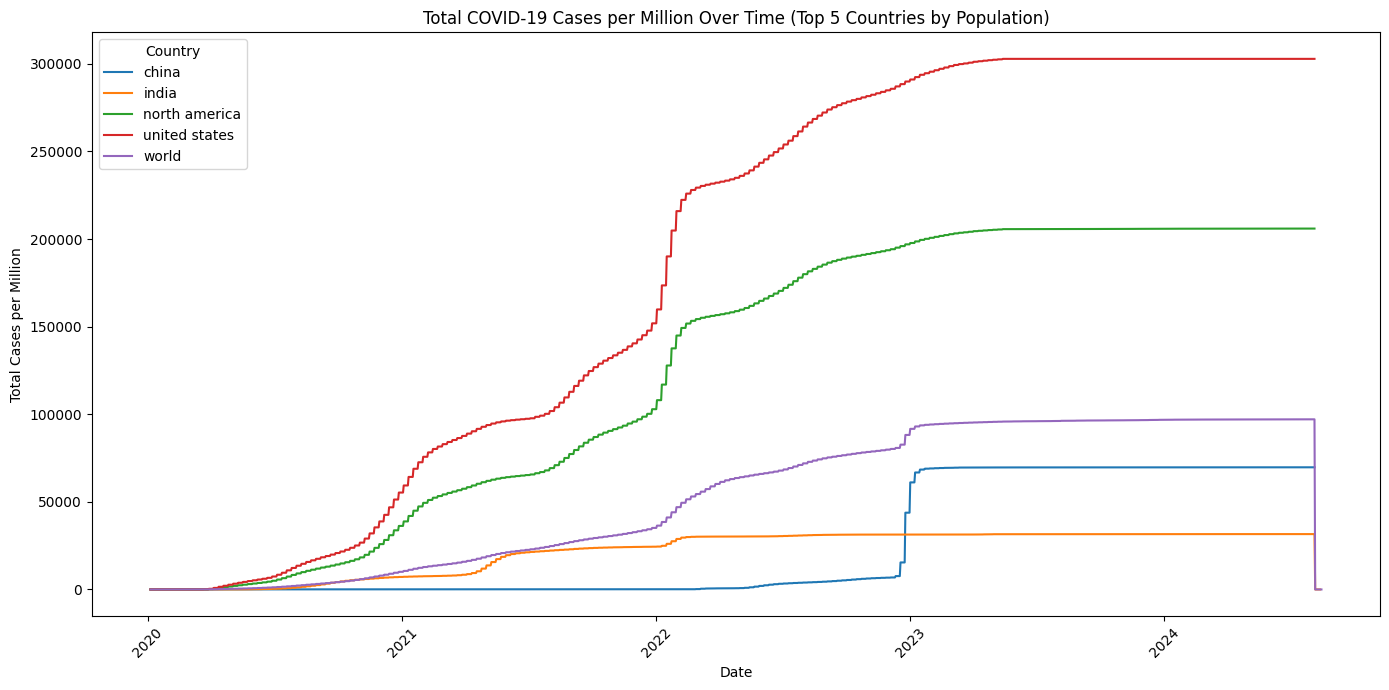

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_merged is your cleaned and merged dataframe with columns:
# 'location', 'date', 'total_cases', 'new_cases', 'Population', 'total_cases_per_million'

# Convert 'date' to datetime if not already
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Select a subset of countries to visualize (top 5 by population or cases)
top_countries = df_merged.groupby('location')['Population'].max().sort_values(ascending=False).head(5).index.tolist()

# Filter data for those countries
df_top = df_merged[df_merged['location'].isin(top_countries)]

# Plot 1: Total COVID-19 cases per million over time for top countries
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top, x='date', y='total_cases_per_million', hue='location')
plt.title('Total COVID-19 Cases per Million Over Time (Top 5 Countries by Population)')
plt.ylabel('Total Cases per Million')
plt.xlabel('Date')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





## 📈 Plot 1: Total COVID-19 Cases per Million Over Time


### **Interpretation**
This line chart shows the **cumulative total cases per million** for selected countries: China, India, North America, the United States, and the world average.

### **Justification**
- **United States** and **North America** have the highest cases per million, highlighting a high infection rate relative to their population.
- **India** shows moderate growth that flattens post-2022.
- **China** has the lowest rate, likely due to strict lockdown policies and/or underreporting.
- The **World average** lies in the middle, balancing countries with both high and low infection rates.

### **Conclusion**
Countries in North America experienced **higher per capita infections**, while Asia (especially China) maintained **much lower rates**, indicating **diverse regional outcomes**.


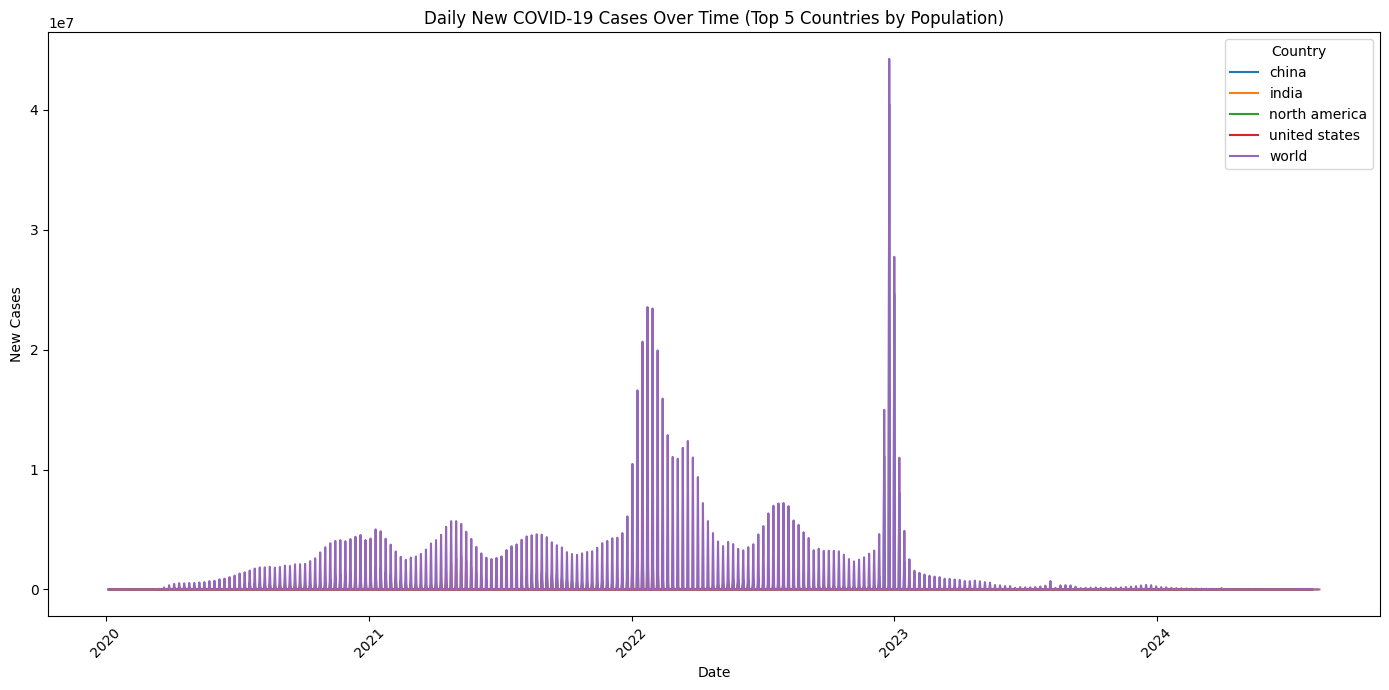

In [79]:
# Plot 2: New daily COVID-19 cases (smoothed) over time for top countries
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_top, x='date', y='new_cases', hue='location')
plt.title('Daily New COVID-19 Cases Over Time (Top 5 Countries by Population)')
plt.ylabel('New Cases')
plt.xlabel('Date')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 📊 Plot 2: Daily New COVID-19 Cases Over Time

![Daily New Cases](attachment:0dec9e8f-90ff-4b2a-887e-f51a56c7745c.png)

### **Interpretation**
This bar plot shows the trend of **new daily COVID-19 cases** across time for the top 5 most populous countries.

### **Justification**
- Significant **spikes** represent **major waves**, especially in **early 2022** (Omicron).
- The **peak daily cases** occurred at the start of 2022, after which case numbers declined.
- The repeating wave patterns suggest a **seasonal and variant-based resurgence**.
- Decline in 2023–2024 may reflect **vaccination effects** or **reduced testing/reporting**.

### **Conclusion**
This plot illustrates the **wave-based nature** of the pandemic and how **variant surges** influenced global infection patterns.


Number of rows after filtering on 2021-06-01: 181


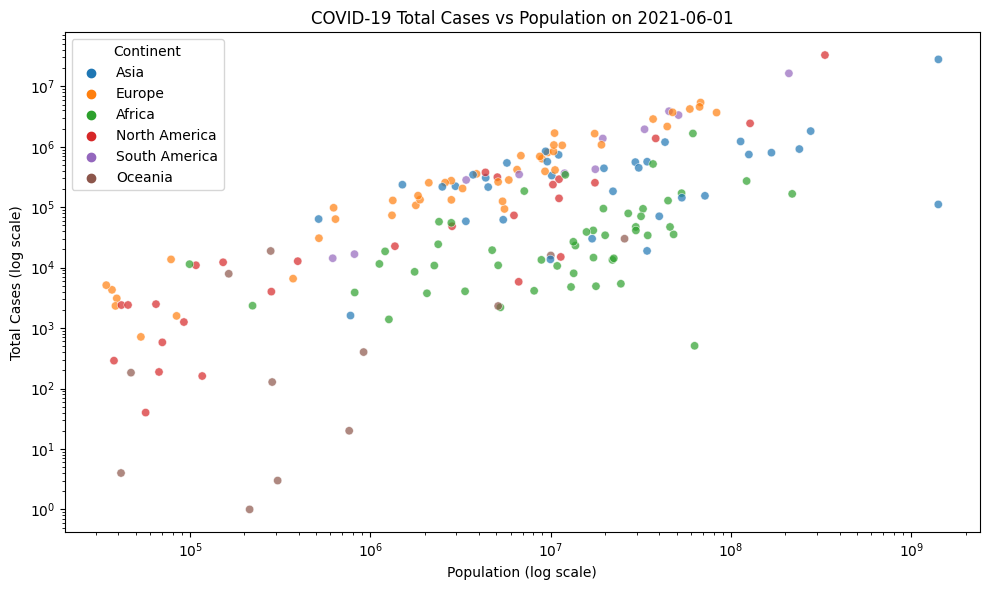

In [80]:
# Use a more relevant date
date_of_interest = pd.to_datetime("2021-06-01")
df_snapshot = df_merged[df_merged['date'] == date_of_interest]

# Filter valid rows
df_snapshot = df_snapshot[
    (df_snapshot['Population'] > 0) &
    (df_snapshot['total_cases'] > 0) &
    (~df_snapshot['Population'].isna()) &
    (~df_snapshot['total_cases'].isna())
]

print(f"Number of rows after filtering on {date_of_interest.date()}: {len(df_snapshot)}")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_snapshot, x='Population', y='total_cases', hue='continent', alpha=0.7)
plt.title(f'COVID-19 Total Cases vs Population on {date_of_interest.date()}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Population (log scale)')
plt.ylabel('Total Cases (log scale)')
plt.legend(title='Continent')
plt.tight_layout()
plt.show()



## 🌍 Plot 3: COVID-19 Total Cases vs Population (Log Scale)

![Scatter Plot](attachment:8baeef64-894a-4f19-b962-6c5b98774b17.png)

### **Interpretation**
A scatter plot of **total COVID-19 cases vs population** on 2021-06-01, using **log-log scale**, with each point representing a country and colored by continent.

### **Justification**
- There is a **loose positive correlation** between population and total cases.
- **Europe** and **North America** show high cases regardless of population size.
- **Africa** and **Oceania** cluster at the bottom left, suggesting lower case counts and/or underreporting.
- Some **outliers** deviate from the general trend, reflecting differences in testing, reporting, and policy.

### **Conclusion**
While **population size contributes** to the number of total cases, **government response, health infrastructure, and transparency** are significant factors driving variations between countries.


## 📌 Summary Table

| Plot | Key Insight |
|------|-------------|
| **Plot 1** | Per capita infection rates highlight North America’s severity and China’s containment success. |
| **Plot 2** | Pandemic had wave-like behavior, peaking during major variant outbreaks. |
| **Plot 3** | Population correlates with total cases, but disparities show importance of policy and testing capacity. |

### 🔧 If I Had More Time to Complete the Project

If I had additional time to work on this project, I would take the following actions to further enhance its quality and depth:

- **Improve Data Consistency:** Refine and expand the normalization of country names to ensure more accurate merges across datasets.
- **Include Updated Population Data:** Integrate more recent or projected population data (post-2020) to improve the relevance of analyses.
- **Add Deeper Analytical Insights:** Explore statistical correlations between COVID-19 impact and socio-economic indicators such as GDP per capita, median age, and healthcare capacity.
- **Develop Interactive Visualizations:** Build interactive dashboards (e.g., using Plotly or Tableau) to allow dynamic exploration of the data by country, year, and metric.
- **Implement Predictive Modeling:** Use time series forecasting (e.g., ARIMA, Prophet) to project future trends in cases or deaths based on historical patterns.
- **Document Assumptions and Limitations:** Clearly outline data limitations, processing assumptions, and potential biases to ensure transparency and replicability.
